## trying to predict the classification for each woman.

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
#from sklearn import cross_val_score 
%matplotlib inline

In [7]:
dta = sm.datasets.fair.load_pandas().data

In [8]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [9]:
# add "affair" column: 1 represents having affairs, 0 represents not 
dta['affair'] = (dta.affairs >0).astype(int)


In [10]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [11]:
dt=dta.copy()

In [13]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + occupation + occupation_husb',dta, return_type="dataframe")



In [14]:
y

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6361,0.0
6362,0.0
6363,0.0
6364,0.0


In [15]:
X

,Intercept,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,1.0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,1.0,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,1.0,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,1.0,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,1.0,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...
6361,1.0,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0
6362,1.0,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0
6363,1.0,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0
6364,1.0,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0


In [16]:

y = np.ravel(y)

In [18]:
y

array([1., 1., 1., ..., 0., 0., 0.])

<AxesSubplot:>

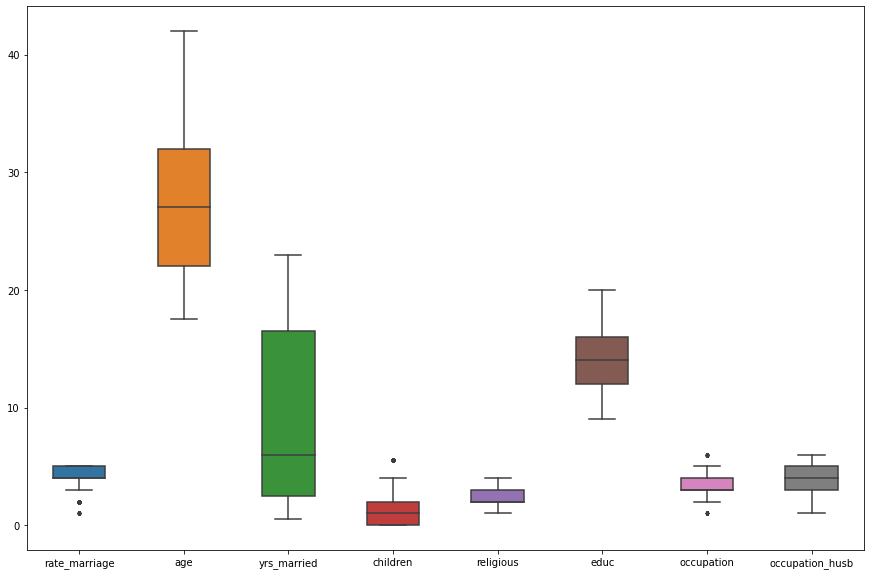

In [37]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X, width= 0.5,ax=ax,  fliersize=3)


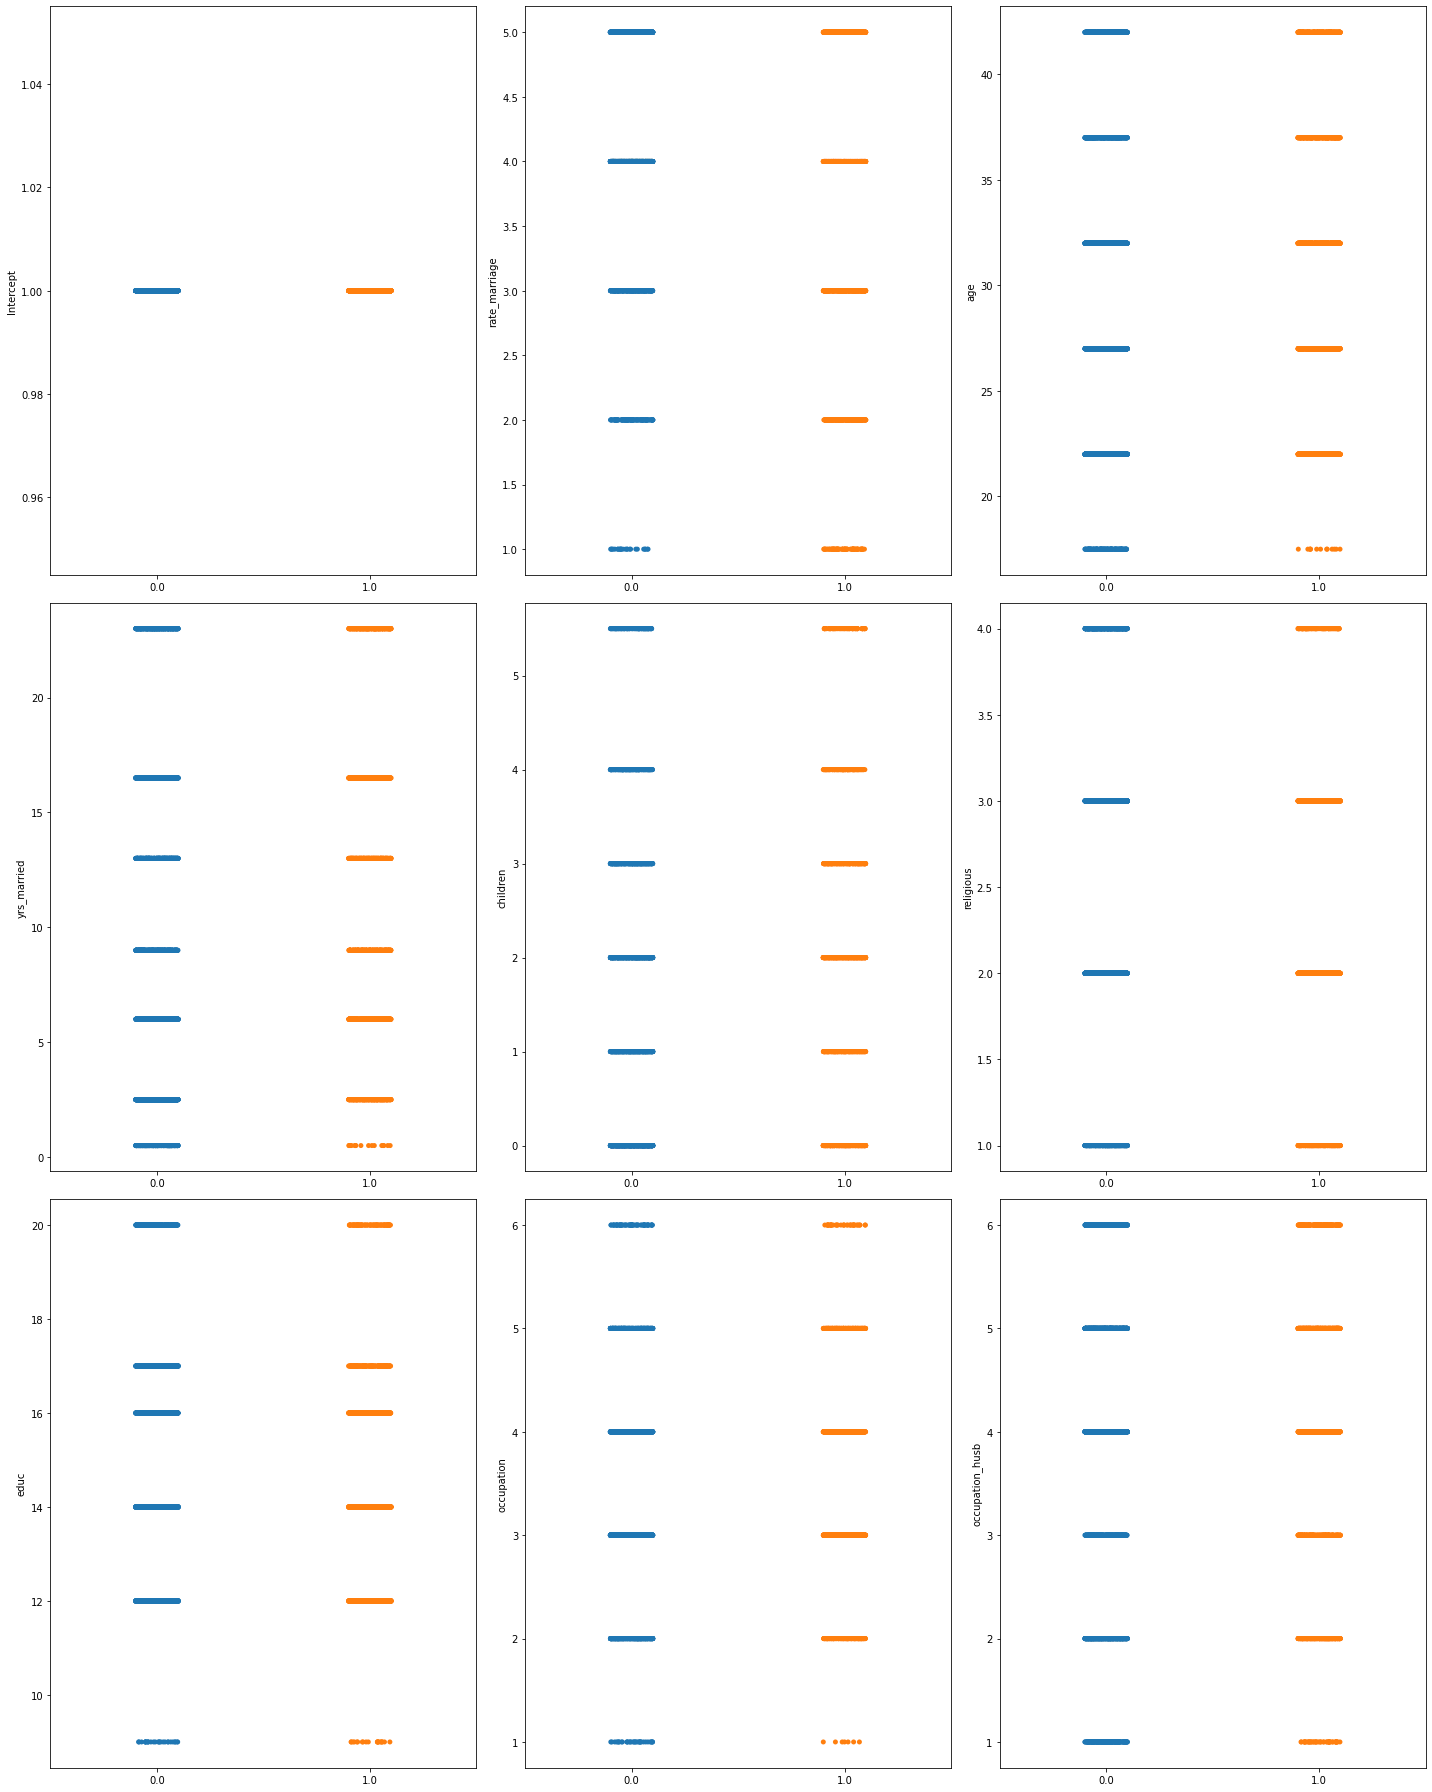

In [30]:
# let's see how data is distributed for every column
import seaborn as sns
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(x =y, y = X[column])
    plotnumber+=1
plt.tight_layout()

In [35]:
X = X.drop(columns = ['Intercept'])

In [36]:
#testing for multicolinerity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

#scaling data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.034798,rate_marriage
1,5.454116,age
2,7.142949,yrs_married
3,2.528972,children
4,1.036906,religious
5,1.296242,educ
6,1.206863,occupation
7,1.082876,occupation_husb


the Vif factor for Age and years of marriage are above 5 wo we will drop  them both

In [40]:
X = X.drop(columns = ['age','yrs_married'])
X.head()

,rate_marriage,children,religious,educ,occupation,occupation_husb
0,3.0,3.0,3.0,17.0,2.0,5.0
1,3.0,3.0,1.0,14.0,3.0,4.0
2,4.0,0.0,1.0,16.0,3.0,5.0
3,4.0,4.0,3.0,16.0,5.0,5.0
4,5.0,1.0,1.0,14.0,3.0,4.0


In [41]:
#splitting the data set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y =train_test_split(X,y,test_size=0.20,random_state= 20)

In [44]:
log_reg =LogisticRegression()
log_reg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,f1_score, recall_score, precision_score


In [49]:
y_pred = log_reg.predict(test_x)

In [78]:
#saving the model to a local file
import pickle
filename ='affair_model_prediction'
pickle.dump(log_reg, open(filename,'wb'))

In [50]:
# Confusion Matrix
conf_mat = confusion_matrix(test_y,y_pred)
conf_mat

array([[802,  69],
       [283, 120]], dtype=int64)

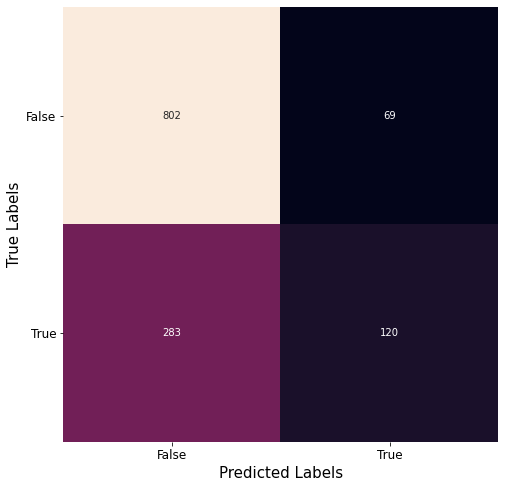

In [77]:
conf_mat
plt.figure(figsize=(12, 8))
ax =sns.heatmap(conf_mat, square=True, annot=True,fmt = '', cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [52]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [53]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7237048665620094

In [54]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9207807118254879

In [55]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7391705069124423

In [56]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.820040899795501

In [57]:
# Area Under Curve
auc = roc_auc_score(test_y, y_pred)
auc

0.6092737306025702

In [63]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.92      0.82       871
         1.0       0.63      0.30      0.41       403

    accuracy                           0.72      1274
   macro avg       0.69      0.61      0.61      1274
weighted avg       0.71      0.72      0.69      1274



In [64]:

print("Accuracy:",accuracy_score(test_y,y_pred))
print("Precision:",precision_score(test_y,y_pred))
print("Recall:",recall_score(test_y,y_pred))
print("F1 Score:",f1_score(test_y,y_pred))

Accuracy: 0.7237048665620094
Precision: 0.6349206349206349
Recall: 0.2977667493796526
F1 Score: 0.4054054054054054


In [61]:
y_pred = log_reg.predict(test_x)
fpr, tpr, thresholds = roc_curve(test_y, y_pred)

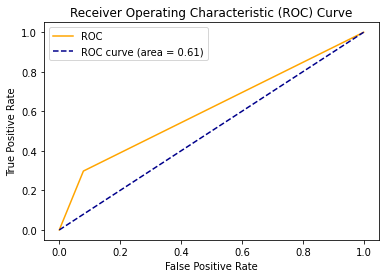

In [62]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()